Tạo venv2 với python mới nhất (3.11.4):
- Dẫn về vị trí lưu python 3.11.4 : cd C:\Users\kienv\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Python 3.11
- Tạo môi trường tên venv2 tại ổ D:\OneDrive\Desktop\AI_projects\1.ClassifyAnyImages\Self_practice\Desktop_venv2
    python -m venv D:\OneDrive\Desktop\AI_projects\1.ClassifyAnyImages\Self_practice\Desktop_venv2 
    
    Note : Tên môi trường sẽ mặc định là folder chứa venv đó. Nên nếu đặt trong folder A thì môi trường mặc định tên là A

!pip install ipykernel

!python -m ipykernel install --name=desktop_venv2

pip install sklearn tensorflow keras matplotlib numpy opencv-python

Tập dữ liệu sử dụng : Intel Images classification gồm 6 classes :
    
    - Building
    
    - Forest
    
    - Galcier

    - Mountain

    - Sea
    
    - Street

In [22]:
import matplotlib
import sklearn
from tensorflow.keras.utils import img_to_array
from keras.utils import to_categorical
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import cv2
import os
from sklearn.model_selection import train_test_split

In [15]:
# đường dẫn đến tập train
datapath = r'D:/Self_practice/Data/Intel_images/kien_data'

In [16]:
# grab the image path and shuffle them
imagepaths = sorted(list(paths.list_images(datapath)))
random.seed()
random.shuffle(imagepaths)
imagepaths

['D:/Self_practice/Data/Intel_images/kien_data\\mountain\\20093.jpg',
 'D:/Self_practice/Data/Intel_images/kien_data\\buildings\\20078.jpg',
 'D:/Self_practice/Data/Intel_images/kien_data\\street\\20069.jpg',
 'D:/Self_practice/Data/Intel_images/kien_data\\mountain\\20107.jpg',
 'D:/Self_practice/Data/Intel_images/kien_data\\mountain\\20153.jpg',
 'D:/Self_practice/Data/Intel_images/kien_data\\street\\20088.jpg',
 'D:/Self_practice/Data/Intel_images/kien_data\\glacier\\20210.jpg',
 'D:/Self_practice/Data/Intel_images/kien_data\\street\\20066.jpg',
 'D:/Self_practice/Data/Intel_images/kien_data\\mountain\\20116.jpg',
 'D:/Self_practice/Data/Intel_images/kien_data\\sea\\20148.jpg',
 'D:/Self_practice/Data/Intel_images/kien_data\\street\\20067.jpg',
 'D:/Self_practice/Data/Intel_images/kien_data\\street\\20126.jpg',
 'D:/Self_practice/Data/Intel_images/kien_data\\forest\\20117.jpg',
 'D:/Self_practice/Data/Intel_images/kien_data\\forest\\20056.jpg',
 'D:/Self_practice/Data/Intel_images/ki

In [17]:
# khởi tạo các giá trị model
batch_size = 32
epochs = 30
lr = 1e-3

image_size = 224
num_classes = 0

# khởi tạo data và nhãn label
data = []
labels = []
classNum = []
classNames = []

In [18]:
#lấy các subfolder trong folder train làm các nhãn
subfolders = [f.path for f in os.scandir(datapath) if f.is_dir()]
print(subfolders)  #quét tất cả các nhãn trong folder seg_train

i=0
for folder in subfolders:
    s= folder.split('\\')[-1]
    classNum.append(i)
    classNames.append(s)
    i=i+1

num_classes = len(classNum)
print(classNum)

['D:/Self_practice/Data/Intel_images/kien_data\\buildings', 'D:/Self_practice/Data/Intel_images/kien_data\\forest', 'D:/Self_practice/Data/Intel_images/kien_data\\glacier', 'D:/Self_practice/Data/Intel_images/kien_data\\mountain', 'D:/Self_practice/Data/Intel_images/kien_data\\sea', 'D:/Self_practice/Data/Intel_images/kien_data\\street']
[0, 1, 2, 3, 4, 5]


In [19]:
# TẠO NHÃN CHO TỪNG ẢNH TỪ CHÍNH PATH CỦA CHÚNG
for imagepath in imagepaths:
    image = cv2.imread(imagepath)
    image = cv2.resize(image, (image_size, image_size))
    image = img_to_array(image)
    data.append(image)

    #lấy nhãn từ path và append vào list nhãn
    label = imagepath.split('\\')[-2]
    print('Nhãn :{}'.format(label)[:10])

    i=0
    for name in classNames:
        if label == name:
            label = classNum[i]
            break
        i=i+1

    labels.append(label)

Nhãn :moun
Nhãn :buil
Nhãn :stre
Nhãn :moun
Nhãn :moun
Nhãn :stre
Nhãn :glac
Nhãn :stre
Nhãn :moun
Nhãn :sea
Nhãn :stre
Nhãn :stre
Nhãn :fore
Nhãn :fore
Nhãn :sea
Nhãn :glac
Nhãn :glac
Nhãn :sea
Nhãn :buil
Nhãn :stre
Nhãn :sea
Nhãn :glac
Nhãn :glac
Nhãn :stre
Nhãn :glac
Nhãn :moun
Nhãn :fore
Nhãn :glac
Nhãn :sea
Nhãn :sea
Nhãn :sea
Nhãn :moun
Nhãn :glac
Nhãn :sea
Nhãn :moun
Nhãn :stre
Nhãn :moun
Nhãn :fore
Nhãn :stre
Nhãn :glac
Nhãn :buil
Nhãn :glac
Nhãn :buil
Nhãn :sea
Nhãn :fore
Nhãn :glac
Nhãn :fore
Nhãn :fore
Nhãn :buil
Nhãn :stre
Nhãn :buil
Nhãn :moun
Nhãn :stre
Nhãn :fore
Nhãn :glac
Nhãn :sea
Nhãn :sea
Nhãn :sea
Nhãn :sea
Nhãn :buil
Nhãn :moun
Nhãn :moun
Nhãn :moun
Nhãn :glac
Nhãn :moun
Nhãn :buil
Nhãn :sea
Nhãn :buil
Nhãn :fore
Nhãn :fore
Nhãn :moun
Nhãn :stre
Nhãn :buil
Nhãn :glac
Nhãn :glac
Nhãn :moun
Nhãn :stre
Nhãn :fore
Nhãn :stre
Nhãn :fore
Nhãn :fore
Nhãn :buil
Nhãn :sea
Nhãn :sea
Nhãn :buil
Nhãn :fore
Nhãn :buil
Nhãn :moun
Nhãn :buil
Nhãn :fore
Nhãn :buil
Nhãn :stre
Nhãn

In [20]:
data = np.array(data, dtype='float')/255.0
labels = np.array(labels)

In [23]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.25, random_state=42)

#convert label sang vector
trainY = to_categorical(trainY, num_classes=len(classNum))
testY = to_categorical(testY, num_classes=len(classNum))

In [24]:
print(labels[:10])

[3 0 5 3 3 5 2 5 3 4]


In [25]:
trainY

array([[1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0.

In [26]:
trainX

array([[[[0.92156863, 0.9372549 , 0.95686275],
         [0.92156863, 0.9372549 , 0.95686275],
         [0.92156863, 0.9372549 , 0.95686275],
         ...,
         [0.9372549 , 0.94901961, 0.96470588],
         [0.9372549 , 0.94901961, 0.96470588],
         [0.9372549 , 0.94901961, 0.96470588]],

        [[0.92156863, 0.9372549 , 0.95686275],
         [0.92156863, 0.9372549 , 0.95686275],
         [0.91764706, 0.93333333, 0.95294118],
         ...,
         [0.93333333, 0.94509804, 0.96078431],
         [0.93333333, 0.94509804, 0.96078431],
         [0.93333333, 0.94509804, 0.96078431]],

        [[0.92156863, 0.9372549 , 0.95686275],
         [0.91764706, 0.93333333, 0.95294118],
         [0.91764706, 0.93333333, 0.95294118],
         ...,
         [0.92941176, 0.94509804, 0.96078431],
         [0.92941176, 0.94509804, 0.96078431],
         [0.92941176, 0.94509804, 0.96078431]],

        ...,

        [[0.9372549 , 0.96862745, 0.97254902],
         [0.94509804, 0.97647059, 0.98039216]

In [27]:
#create model
from keras.models import Model, load_model, Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.applications import vgg16

base_model = vgg16.VGG16(weights = 'imagenet', include_top=False, input_shape=(image_size, image_size,3))
print(base_model.summary())


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [28]:
from tensorflow import keras
from tensorflow.keras import layers

#freeze layers
for layer in base_model.layers:
    layer.trainable = False

#create model
model= Sequential()

model.add(base_model)  #add convolution base model
# add new layers
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dense(1024,activation='relu'))

model.add(Dense(num_classes, activation='softmax'))
print(model.summary())



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 1024)              25691136  
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_2 (Dense)             (None, 6)                 6150      
                                                                 
Total params: 41461574 (158.16 MB)
Trainable params: 26746886 (102.03 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________
None


In [29]:
#compile model
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics = ['accuracy'])

In [36]:
 #start training
hist = model.fit(trainX, trainY, validation_split=0.3, batch_size=32, epochs=20, verbose=2)

Epoch 1/20
2/2 - 7s - loss: 2.4465e-05 - accuracy: 1.0000 - val_loss: 1.9928 - val_accuracy: 0.5455 - 7s/epoch - 4s/step
Epoch 2/20
2/2 - 6s - loss: 2.0764e-05 - accuracy: 1.0000 - val_loss: 1.9524 - val_accuracy: 0.5455 - 6s/epoch - 3s/step
Epoch 3/20
2/2 - 6s - loss: 1.9555e-05 - accuracy: 1.0000 - val_loss: 1.9138 - val_accuracy: 0.5909 - 6s/epoch - 3s/step
Epoch 4/20
2/2 - 6s - loss: 1.7930e-05 - accuracy: 1.0000 - val_loss: 1.8797 - val_accuracy: 0.6364 - 6s/epoch - 3s/step
Epoch 5/20
2/2 - 6s - loss: 1.6357e-05 - accuracy: 1.0000 - val_loss: 1.8521 - val_accuracy: 0.5909 - 6s/epoch - 3s/step
Epoch 6/20
2/2 - 6s - loss: 1.6092e-05 - accuracy: 1.0000 - val_loss: 1.8288 - val_accuracy: 0.5909 - 6s/epoch - 3s/step
Epoch 7/20
2/2 - 6s - loss: 1.5222e-05 - accuracy: 1.0000 - val_loss: 1.8082 - val_accuracy: 0.5909 - 6s/epoch - 3s/step
Epoch 8/20
2/2 - 6s - loss: 1.4533e-05 - accuracy: 1.0000 - val_loss: 1.7926 - val_accuracy: 0.5909 - 6s/epoch - 3s/step
Epoch 9/20
2/2 - 6s - loss: 1.40

In [37]:
#Show tets loss and accuracy
model.save('model_vgg16.h5')
model = load_model('model_vgg16.h5')

score = model.evaluate(testX, testY, verbose=0)

print(' accuracy : {}'.format(score[1]))

d:\Self_practice\desktop_venv\desktop_venv\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


 accuracy : 0.7916666865348816


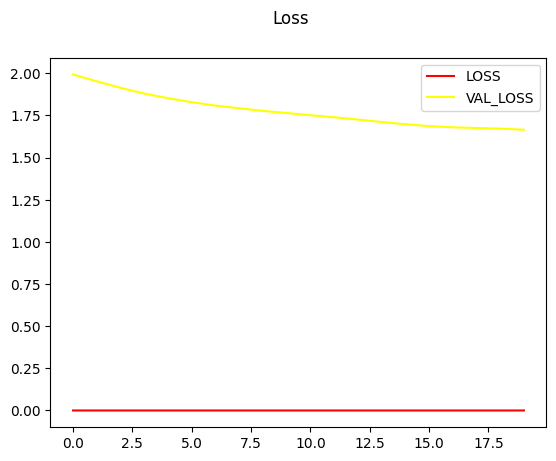

In [41]:
# plot Loss performance
fig = plt.figure()
plt.plot(hist.history['loss'], color='red', label='LOSS')
plt.plot(hist.history['val_loss'], color='yellow', label = 'VAL_LOSS')
plt.suptitle('Loss')
plt.legend(loc='upper right')
plt.show()

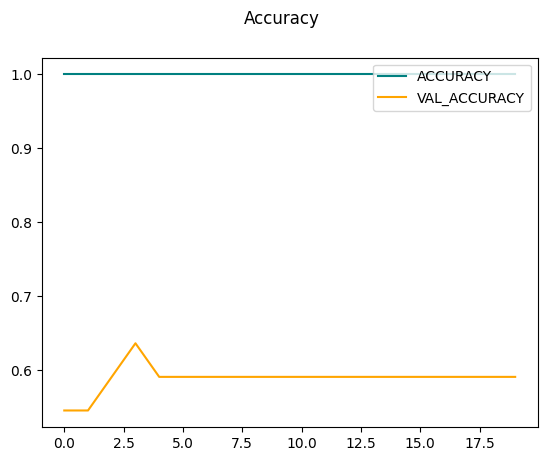

In [42]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='ACCURACY')
plt.plot(hist.history['val_accuracy'], color='orange', label = 'VAL_ACCURACY')
plt.suptitle('Accuracy')
plt.legend(loc='upper right')
plt.show()

In [44]:
#making prediction
import numpy as np
from keras.preprocessing import image
from tensorflow.keras.preprocessing import image
from keras.models import load_model

%matplotlib notebook

model = load_model('model_vgg16.h5')

test_file_path = 'D:/Self_practice/Data/Intel_images/kien_data/forest/20151.jpg'

test_image = image.load_img(test_file_path, target_size= (image_size, image_size))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

result = model.predict(test_image)
print(result)

1/1 [==============================] - 0s 231ms/step
[[0. 1. 0. 0. 0. 0.]]
